In [1]:
import torch

In [6]:
!pip3 install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.0/821.0 MB 3.9 MB/s eta 0:00:0000:0100:06
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 4.4 MB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 5.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 5.5 MB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 8.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 6.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 6.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 6.

In [3]:
!pip install ultralytics 

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
from ultralytics import YOLO
import cv2
import imageio
import numpy as np
from PIL import Image

/opt/anaconda/lib/python3.12/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [3]:
model = YOLO("yolov8n.pt")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 7.35MB/s]


In [4]:
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [6]:
image_path='./lol.jpg'
results = model.predict(image_path, save=True, imgsz=320, conf=0.5, classes=[0])


image 1/1 /root/deepLearning/lol.jpg: 224x320 1 person, 59.8ms
Speed: 0.7ms preprocess, 59.8ms inference, 61.1ms postprocess per image at shape (1, 3, 224, 320)
Results saved to /root/deepLearning/Mamba-YOLO/runs/detect/predict


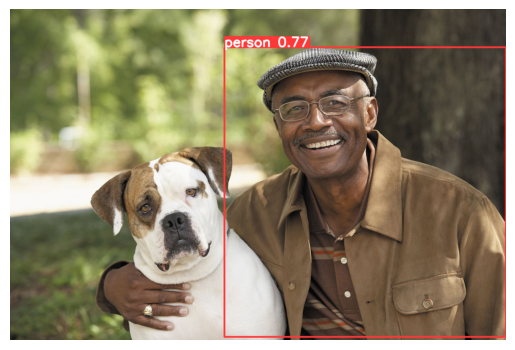

In [7]:
import matplotlib.pyplot as plt
annotated = results[0].plot()
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [10]:
from ultralytics import YOLO
import cv2
import time

# Load model
model = YOLO('/root/deepLearning/Mamba-YOLO/output_dir/mscoco/mambayolo33/weights/best.pt')

# Open camera
cap = cv2.VideoCapture(0)  # 0 for default camera
if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

# Optional: Save video output
# out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, (int(cap.get(3)), int(cap.get(4))))

while True:
    start_time = time.time()
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture frame.")
        break

    # Perform detection
    results = model.predict(source=frame, imgsz=640, device=0, conf=0.5, stream=True)
    person_count = 0

    for result in results:
        person_count = sum(1 for box in result.boxes if int(box.cls) == 0)  # Class 0 is 'person'
        annotated_frame = result.plot()  # Draws bounding boxes and labels

        # Display count
        cv2.putText(
            annotated_frame,
            f"People: {person_count}",
            (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (0, 255, 0),
            2
        )

        # Display FPS
        fps = 1 / (time.time() - start_time)
        cv2.putText(
            annotated_frame,
            f"FPS: {fps:.2f}",
            (10, 60),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (0, 255, 0),
            2
        )

        # Show frame
        cv2.imshow('YOLO People Counting', annotated_frame)

        # Save frame (optional)
        # out.write(annotated_frame)

    # Exit on 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Cleanup
cap.release()
# out.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 69.9ms
Speed: 2.2ms preprocess, 69.9ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 18.6ms
Speed: 2.5ms preprocess, 18.6ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


QObject::moveToThread: Current thread (0x55b6c3f8f240) is not the object's thread (0x55b6c8330120).
Cannot move to target thread (0x55b6c3f8f240)

QObject::moveToThread: Current thread (0x55b6c3f8f240) is not the object's thread (0x55b6c8330120).
Cannot move to target thread (0x55b6c3f8f240)

QObject::moveToThread: Current thread (0x55b6c3f8f240) is not the object's thread (0x55b6c8330120).
Cannot move to target thread (0x55b6c3f8f240)

QObject::moveToThread: Current thread (0x55b6c3f8f240) is not the object's thread (0x55b6c8330120).
Cannot move to target thread (0x55b6c3f8f240)

QObject::moveToThread: Current thread (0x55b6c3f8f240) is not the object's thread (0x55b6c8330120).
Cannot move to target thread (0x55b6c3f8f240)

QObject::moveToThread: Current thread (0x55b6c3f8f240) is not the object's thread (0x55b6c8330120).
Cannot move to target thread (0x55b6c3f8f240)

QObject::moveToThread: Current thread (0x55b6c3f8f240) is not the object's thread (0x55b6c8330120).
Cannot move to tar


0: 480x640 (no detections), 15.3ms
Speed: 2.3ms preprocess, 15.3ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 16.5ms
Speed: 3.7ms preprocess, 16.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 15.6ms
Speed: 1.4ms preprocess, 15.6ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 18.0ms
Speed: 1.7ms preprocess, 18.0ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 18.3ms
Speed: 1.6ms preprocess, 18.3ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 18.4ms
Speed: 1.5ms preprocess, 18.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 18.4ms
Speed: 2.3ms preprocess, 18.4ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 18.4ms
Speed: 1.5ms preprocess, 18.4ms i

In [26]:
import cv2

# Open the default camera
cam = cv2.VideoCapture(0)

# Get the default frame width and height
frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (frame_width, frame_height))

results = model.predict(image_path, save=True, imgsz=320, conf=0.5, classes=[0])

while True:
    ret, frame = cam.read()

    # Write the frame to the output file
    out.write(frame)

    # Display the captured frame
    cv2.imshow('Camera', frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) == ord('q'):
        break

# Release the capture and writer objects
cam.release()
out.release()
cv2.destroyAllWindows()


image 1/1 /root/deepLearning/deepLearning/pytorch/yoloPractice/lol.jpg: 224x320 1 person, 4.1ms
Speed: 0.7ms preprocess, 4.1ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 320)
Results saved to runs/detect/predict3


QObject::moveToThread: Current thread (0x55e918cd75e0) is not the object's thread (0x55e918d53720).
Cannot move to target thread (0x55e918cd75e0)

QObject::moveToThread: Current thread (0x55e918cd75e0) is not the object's thread (0x55e918d53720).
Cannot move to target thread (0x55e918cd75e0)

QObject::moveToThread: Current thread (0x55e918cd75e0) is not the object's thread (0x55e918d53720).
Cannot move to target thread (0x55e918cd75e0)

QObject::moveToThread: Current thread (0x55e918cd75e0) is not the object's thread (0x55e918d53720).
Cannot move to target thread (0x55e918cd75e0)

QObject::moveToThread: Current thread (0x55e918cd75e0) is not the object's thread (0x55e918d53720).
Cannot move to target thread (0x55e918cd75e0)

QObject::moveToThread: Current thread (0x55e918cd75e0) is not the object's thread (0x55e918d53720).
Cannot move to target thread (0x55e918cd75e0)

QObject::moveToThread: Current thread (0x55e918cd75e0) is not the object's thread (0x55e918d53720).
Cannot move to tar

In [27]:
import cv2
from ultralytics import YOLO

model = YOLO('yolov8n.pt') 
cam = cv2.VideoCapture(0)

frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (frame_width, frame_height))

while True:
    ret, frame = cam.read()
    if not ret:
        print("Error al capturar el frame")
        break

    results = model.predict(frame, imgsz=320, conf=0.5, classes=[0]) 
    annotated_frame = results[0].plot()
    out.write(annotated_frame)

    cv2.imshow('YOLO + Camera', annotated_frame)

    if cv2.waitKey(1) == ord('q'):
        break

cam.release()
out.release()
cv2.destroyAllWindows()


0: 256x320 2 persons, 30.2ms
Speed: 0.5ms preprocess, 30.2ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 persons, 3.4ms
Speed: 0.5ms preprocess, 3.4ms inference, 5.9ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 persons, 3.1ms
Speed: 0.8ms preprocess, 3.1ms inference, 3.4ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 persons, 4.5ms
Speed: 1.0ms preprocess, 4.5ms inference, 3.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 persons, 3.6ms
Speed: 1.2ms preprocess, 3.6ms inference, 4.2ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 persons, 3.3ms
Speed: 1.9ms preprocess, 3.3ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 persons, 3.7ms
Speed: 1.5ms preprocess, 3.7ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 persons, 3.7ms
Speed: 0.6ms preprocess, 3.7ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320

QObject::moveToThread: Current thread (0x55e918cd75e0) is not the object's thread (0x55e918d53720).
Cannot move to target thread (0x55e918cd75e0)

QObject::moveToThread: Current thread (0x55e918cd75e0) is not the object's thread (0x55e918d53720).
Cannot move to target thread (0x55e918cd75e0)

QObject::moveToThread: Current thread (0x55e918cd75e0) is not the object's thread (0x55e918d53720).
Cannot move to target thread (0x55e918cd75e0)

QObject::moveToThread: Current thread (0x55e918cd75e0) is not the object's thread (0x55e918d53720).
Cannot move to target thread (0x55e918cd75e0)

QObject::moveToThread: Current thread (0x55e918cd75e0) is not the object's thread (0x55e918d53720).
Cannot move to target thread (0x55e918cd75e0)

QObject::moveToThread: Current thread (0x55e918cd75e0) is not the object's thread (0x55e918d53720).
Cannot move to target thread (0x55e918cd75e0)

QObject::moveToThread: Current thread (0x55e918cd75e0) is not the object's thread (0x55e918d53720).
Cannot move to tar


0: 256x320 2 persons, 3.7ms
Speed: 1.2ms preprocess, 3.7ms inference, 2.5ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 persons, 3.9ms
Speed: 0.8ms preprocess, 3.9ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 persons, 3.1ms
Speed: 0.5ms preprocess, 3.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 persons, 3.1ms
Speed: 0.5ms preprocess, 3.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 persons, 3.1ms
Speed: 0.6ms preprocess, 3.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 persons, 4.3ms
Speed: 0.9ms preprocess, 4.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 persons, 3.2ms
Speed: 0.6ms preprocess, 3.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 320)

0: 256x320 2 persons, 3.0ms
Speed: 0.6ms preprocess, 3.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 320)


In [5]:
from ultralytics.engine.predictor import BasePredictor
from pathlib import Path
import torch
import re
from typing import List

class CustomPersonCountPredictor(BasePredictor):
    def write_results(self, i: int, p: Path, im: torch.Tensor, s: List[str]) -> str:
        """
        Write inference results to a file or directory.
        Modified to print count of detected persons (class_id == 0).
        """
        string = ""
        if len(im.shape) == 3:
            im = im[None]  # expand for batch dim

        if self.source_type.stream or self.source_type.from_img or self.source_type.tensor:
            string += f"{i}: "
            frame = self.dataset.count
        else:
            match = re.search(r"frame (\d+)/", s[i])
            frame = int(match[1]) if match else 0

        self.txt_path = self.save_dir / "labels" / (p.stem + ("" if self.dataset.mode == "image" else f"_{frame}"))
        string += "{:g}x{:g} ".format(*im.shape[2:])

        result = self.results[i]
        result.save_dir = self.save_dir.__str__()  # used in other locations

        try:
            string += f"{result.verbose()}{result.speed['inference']:.1f}ms"
        except:
            string += "(no verbose info)"

        # ✅ Count persons (class 0)
        person_count = 0
        if hasattr(result, "boxes") and result.boxes is not None:
            try:
                class_ids = result.boxes.cls
                person_count = int((class_ids == 0).sum())
            except:
                pass
        print(f"[Image {i}] Detected {person_count} person(s)")
        return string


In [39]:
image_path='lol.jpg'
results = model.predict(image_path, save=True, imgsz=320, conf=0.5, classes=[0])


[Image 0] Persons detected: 0
image 1/1 /root/deepLearning/deepLearning/pytorch/yoloPractice/lol.jpg: 224x320 (raw tensor)
Speed: 14.2ms preprocess, 4.7ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 320)
Results saved to runs/detect/predict35


In [6]:
from ultralytics import YOLO

model = YOLO('./yolov8n.pt')
image_path = 'lol.jpg'

results = model.predict(
    image_path,
    save=True,
    imgsz=320,
    conf=0.5,
    predictor=CustomPersonCountPredictor  # sin paréntesis
)



[Image 0] Detected 0 person(s)
image 1/1 /root/deepLearning/deepLearning/pytorch/yoloPractice/lol.jpg: 224x320 (no verbose info)
Speed: 0.6ms preprocess, 4.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 320)
Results saved to runs/detect/predict40


In [1]:
import cv2
from ultralytics import YOLO
from ultralytics.solutions import ObjectCounter

def count_objects_in_region(video_path, output_video_path, model_path):
    cap = cv2.VideoCapture(video_path)
    assert cap.isOpened(), "Error reading video file"
    w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
    video_writer = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

    # Cargar modelo YOLO
    model = YOLO(model_path)

    # Obtener nombres de clases
    class_names = model.names

    # Región de conteo
    region_points = [(20, 400), (1080, 400), (1080, 360), (20, 360)]

    # Instanciar contador
    counter = ObjectCounter(classes_names=class_names, reg_pts=region_points)

    while cap.isOpened():
        success, im0 = cap.read()
        if not success:
            print("Video frame is empty or processing is complete.")
            break

        # Inferencia con YOLO
        results = model.track(im0, persist=True, verbose=False)[0]

        if results and results.boxes.id is not None:
            tracks = results.boxes
            # Conteo con el contador
            counter.start_counting(im0, tracks)

        # Mostrar y guardar
        cv2.imshow("Output", im0)
        video_writer.write(im0)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    video_writer.release()
    cv2.destroyAllWindows()

# Uso
count_objects_in_region("./video.mp4", "output_video.avi", "./yolov8n.pt")


/opt/anaconda/lib/python3.12/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
QObject::moveToThread: Current thread (0x560ea5f475b0) is not the object's thread (0x560ea737f700).
Cannot move to target thread (0x560ea5f475b0)

QObject::moveToThread: Current thread (0x560ea5f475b0) is not the object's thread (0x560ea737f700).
Cannot move to target thread (0x560ea5f475b0)

QObject::moveToThread: Current thread (0x560ea5f475b0) is not the object's thread (0x560ea737f700).
Cannot move to target thread (0x560ea5f475b0)

QObject::moveToThread: Current thread (0x560ea5f475b0) is not the object's thread (0x560ea737f700).
Cannot move to target thread (0x560ea5f475b0)

QObject::moveToThread: Current thread (0x560ea5f475b0) is not the object's thread (0x560ea737f700).
Cannot move to target thread (0x56

Polygon Counter Initiated.


AttributeError: 'Boxes' object has no attribute 'boxes'. See valid attributes below.

    Manages detection boxes, providing easy access and manipulation of box coordinates, confidence scores, class
    identifiers, and optional tracking IDs. Supports multiple formats for box coordinates, including both absolute and
    normalized forms.

    Attributes:
        data (torch.Tensor): The raw tensor containing detection boxes and their associated data.
        orig_shape (tuple): The original image size as a tuple (height, width), used for normalization.
        is_track (bool): Indicates whether tracking IDs are included in the box data.

    Properties:
        xyxy (torch.Tensor | numpy.ndarray): Boxes in [x1, y1, x2, y2] format.
        conf (torch.Tensor | numpy.ndarray): Confidence scores for each box.
        cls (torch.Tensor | numpy.ndarray): Class labels for each box.
        id (torch.Tensor | numpy.ndarray, optional): Tracking IDs for each box, if available.
        xywh (torch.Tensor | numpy.ndarray): Boxes in [x, y, width, height] format, calculated on demand.
        xyxyn (torch.Tensor | numpy.ndarray): Normalized [x1, y1, x2, y2] boxes, relative to `orig_shape`.
        xywhn (torch.Tensor | numpy.ndarray): Normalized [x, y, width, height] boxes, relative to `orig_shape`.

    Methods:
        cpu(): Moves the boxes to CPU memory.
        numpy(): Converts the boxes to a numpy array format.
        cuda(): Moves the boxes to CUDA (GPU) memory.
        to(device, dtype=None): Moves the boxes to the specified device.
    

In [22]:
help(ObjectCounter)


Help on class ObjectCounter in module ultralytics.solutions.object_counter:

class ObjectCounter(builtins.object)
 |  ObjectCounter(classes_names, reg_pts=None, count_reg_color=(255, 0, 255), count_txt_color=(0, 0, 0), count_bg_color=(255, 255, 255), line_thickness=2, track_thickness=2, view_img=False, view_in_counts=True, view_out_counts=True, draw_tracks=False, track_color=None, region_thickness=5, line_dist_thresh=15, cls_txtdisplay_gap=50)
 |
 |  A class to manage the counting of objects in a real-time video stream based on their tracks.
 |
 |  Methods defined here:
 |
 |  __init__(self, classes_names, reg_pts=None, count_reg_color=(255, 0, 255), count_txt_color=(0, 0, 0), count_bg_color=(255, 255, 255), line_thickness=2, track_thickness=2, view_img=False, view_in_counts=True, view_out_counts=True, draw_tracks=False, track_color=None, region_thickness=5, line_dist_thresh=15, cls_txtdisplay_gap=50)
 |      Initializes the ObjectCounter with various tracking and counting parameters.
